# Multilayer Perceptron (MLP)

## Exploring the Multilayer Perceptron (MLP)

The Multilayer Perceptron (MLP) is like a versatile tool in the world of machine learning, especially when it comes to solving problems like sorting things into multiple categories. But to understand how this tool works, let's break it down into simpler parts: perceptrons, layers, and activation functions {cite:p}`goodfellow2016deep`.

**Perceptrons**: Think of perceptrons as tiny decision-making units. Each perceptron takes in some information (like numbers) and processes it to make a decision. The process it uses is pretty straightforward. It multiplies the information by some weights (which are like the importance assigned to different bits of information) and adds a bias (a tweak to the decision). All these calculations result in an output.

**Dense Layers**: Now, imagine putting lots of these perceptrons together in a stack. This stack is called a dense layer. A dense layer is a bit like a committee of perceptrons working together. They all have a say in making a decision. But there's a slight twist: instead of just multiplying and adding, they use a matrix (like a big table of numbers) and a bias vector (a bunch of tweaks) to calculate their output.

**Connecting the Dots**: In the MLP, we connect these dense layers in a clever way. The output of one layer becomes the input for the next. It's like a relay race where each layer passes on the baton of information. This interconnectedness helps the MLP understand complex patterns in data.

**Activation Functions**: Now, here's where things get really interesting. We don't want the MLP to make simple, linear decisions all the time. To tackle tricky problems, we add a special ingredient called activation functions. These functions introduce non-linearity into the MLP. In simpler terms, they let the MLP learn complex stuff, like recognizing handwritten letters or differentiating between cats and dogs. Activation functions make the MLP flexible and capable of understanding intricate patterns and relationships in data.

So, in a nutshell, an MLP is like a team of decision-makers (perceptrons) organized into layers, working together to solve problems. They learn from data, understand complex patterns, and make predictions. It's a powerful tool in the world of machine learning!

## Simplified Mathematics of the Multilayer Perceptron (MLP)

The Multilayer Perceptron (MLP) is a type of feedforward neural network that is particularly useful for tackling multiclass classification problems. To effectively build and comprehend an MLP, it's important to grasp the concepts of perceptrons, layers, and activation functions {cite:p}`TensorFlowDocumentation`.

At the core of Multilayer Perceptrons are functional units known as perceptrons. The equation governing a single perceptron's behavior is given by:

\begin{equation}
Z = \vec{w} \cdot \mathrm{X} + b
\end{equation}
Where:

- $Z$: represents the output of the perceptron.
- $\mathrm{X}$: denotes the feature matrix.
- $\vec{w}$: stands for the weight vector.
- $b$: signifies the bias term.

When these individual perceptrons are arranged in a stack, they collectively form what are known as dense layers. These layers can then be interconnected to construct a neural network. The equation for a dense layer closely resembles that of a single perceptron, but it involves a weight matrix and a bias vector {cite:p}`TensorFlowDocumentation`:

\begin{equation}
Z = \mathrm{W} \cdot \mathrm{X} + \vec{b}
\end{equation}

Where:

- $Z$: represents the output of the dense layer.
- $\mathrm{X}$: denotes the feature matrix.
- $\mathrm{W}$: stands for the weight matrix.
- $\vec{b}$: signifies the bias vector.

In an MLP, numerous dense layers are interlinked in such a manner that the outputs of one layer become inputs to the next layer. To enhance the capabilities of an MLP classifier in capturing intricate decision boundaries and generalizing effectively to new data, non-linear activation functions are applied to the outputs of dense layers. This strategic inclusion of activation functions enables the MLP to learn complex patterns and relationships within the data, ultimately enhancing its classification performance.

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
tf.random.set_seed(22)

<font color='Blue'><b>Example:</b></font> The MNIST dataset, available through TensorFlow Datasets (TFDS), is a widely used dataset in the field of machine learning. It's often considered the "Hello World" of computer vision and deep learning due to its simplicity and relevance. The dataset contains images of handwritten digits (0-9) and their corresponding labels. It's a popular choice for tasks like digit recognition and image classification.

Here's a breakdown of the MNIST dataset from TensorFlow Datasets:

1. **Dataset Source**: The MNIST dataset is hosted and maintained by TensorFlow Datasets (TFDS), which is a library that provides easy access to a wide range of datasets for machine learning projects.

2. **Data**: The dataset consists of two main components:
   - Images: The images are grayscale, 28x28 pixels in size, and represent handwritten digits.
   - Labels: Each image is associated with a label indicating the digit it represents (0-9).

3. **Splitting**: The dataset is often split into three subsets:
   - Training Set: The largest subset used for training the model.
   - Validation Set: A smaller subset used to fine-tune the model's hyperparameters and assess its performance during training.
   - Test Set: A separate subset used to evaluate the final performance of the trained model. It's crucial that the test set remains unseen during training to ensure unbiased evaluation.

4. **Usage**: Researchers and practitioners use the MNIST dataset to develop and test various machine learning algorithms, especially those related to image classification and digit recognition. It's a great starting point for experimenting with different models and techniques.

5. **Accessibility**: You can easily access the MNIST dataset using TensorFlow Datasets. TFDS provides a convenient interface to download, preprocess, and manage datasets, making it easier to incorporate them into your machine learning projects.

The dataset can be accessed through [TensorFlow Datasets](https://www.tensorflow.org/datasets/catalog/mnist). It is essential to partition the MNIST dataset meticulously into distinct subsets: training, validation, and testing sets. This strategic division serves various purposes in the model development process.

During training, the training set provides the foundation for the model to learn and adapt its parameters. Simultaneously, the validation set, often referred to as the development set, acts as a vital tool for assessing the model's performance on data it hasn't encountered before. This is critical for detecting potential overfitting and ensuring the model's generalizability to new, unseen data.

As training progresses, monitoring the model's performance on the validation set helps in making informed decisions about hyperparameters and model architecture adjustments. Once the model has been fine-tuned using the validation set, the ultimate evaluation of its performance occurs on the test set. The test set's distinct role lies in providing an unbiased estimate of the model's effectiveness and generalization capabilities on completely new and previously unseen data.

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Set a random seed for reproducibility
tf.random.set_seed(22)

# Load the MNIST dataset with defined splits
# Using 'as_supervised=True' to load data as (input, target) pairs
# 'train[10000:]' loads the training data starting from the 10,000th sample
# 'train[0:10000]' loads the first 10,000 samples for validation
# 'test' loads the test dataset
train_data, val_data, test_data = tfds.load("mnist",
                                            split=['train[10000:]', 'train[0:10000]', 'test'],
                                            batch_size=128, as_supervised=True)

# Now 'train_data', 'val_data', and 'test_data' hold the respective datasets
# 'train_data' contains batches of training samples and labels
# 'val_data' contains batches of validation samples and labels
# 'test_data' contains batches of test samples and labels
from IPython.display import clear_output
clear_output()

The MNIST dataset comprises handwritten digits accompanied by their corresponding true labels. To provide a visual representation, consider the following display of a few selected examples:

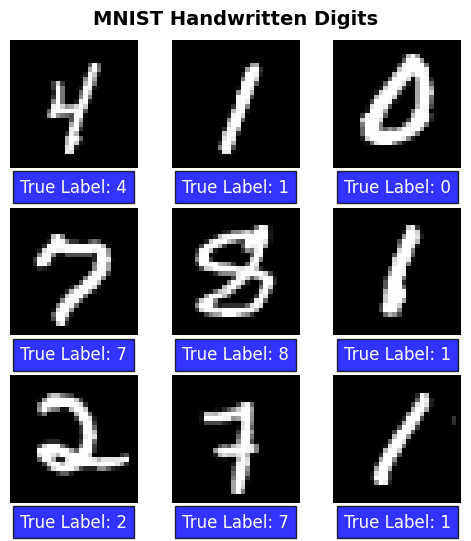

In [3]:
from matplotlib import pyplot as plt
import tensorflow as tf

# Load MNIST data and preprocess
x_viz, y_viz = tfds.load("mnist", split=['train[:1500]'], batch_size=-1, as_supervised=True)[0]
x_viz = tf.squeeze(x_viz, axis=3)

# Create a layout for visualization
fig, axs = plt.subplots(3, 3, figsize=(5, 6))
fig.suptitle("MNIST Handwritten Digits",
             fontsize = 14, weight = 'bold', y= 0.92)

for i, ax in enumerate(axs.flatten()):
    ax.axis('off')
    ax.imshow(x_viz[i], cmap='gray')
    ax.text(0.5, -0.15, f"True Label: {y_viz[i]}", color='white', transform=ax.transAxes,
            fontsize=12, ha='center', va='center',
            bbox=dict(facecolor='Blue', alpha=0.8, pad=5))

plt.subplots_adjust(hspace=0.5)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout for suptitle

Additionally, conduct an analysis of the digit distribution within the training data to confirm the balanced representation of each class within the dataset. This step is crucial to ensure that no particular digit is disproportionately favored or neglected during model training and evaluation.

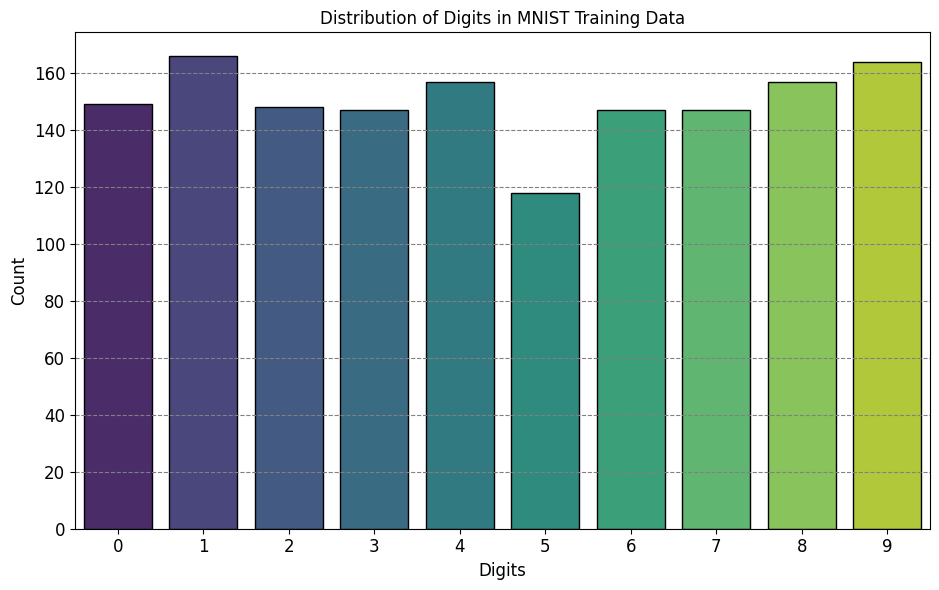

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('https://raw.githubusercontent.com/HatefDastour/ENGG_680/main/Files/mystyle.mplstyle')
import tensorflow as tf

# Load MNIST data and preprocess
x_viz, y_viz = tfds.load("mnist", split=['train[:1500]'], batch_size=-1, as_supervised=True)[0]

# Create a compact layout for the distribution plot
fig, ax = plt.subplots(figsize=(9.5, 6))
sns.countplot(x=y_viz.numpy(), palette="viridis", ec='k', ax=ax)
ax.set(xlabel='Digits', ylabel='Count', title="Distribution of Digits in MNIST Training Data")

plt.tight_layout()

## Data Preprocessing

To begin, reshape the feature matrices into a 2-dimensional format by flattening the images. Subsequently, perform data rescaling to map the pixel values originally within the range of [0, 255] into the more suitable interval of [0, 1]. This rescaling operation harmonizes the distribution of input pixels, promoting enhanced convergence during the training process {cite:p}`TensorFlowDocumentation`.

In [5]:
def preprocess(x, y):
    """
    Preprocess function to reshape and rescale the data.

    Args:
    x (tf.Tensor): Input images.
    y (tf.Tensor): Corresponding labels.

    Returns:
    tf.Tensor: Preprocessed images.
    tf.Tensor: Unchanged labels.
    """
    x = tf.reshape(x, shape=[-1, 784])  # Reshape to 2D
    x = x / 255  # Rescale pixel values
    return x, y

# Applying preprocess function to training and validation data
train_data = train_data.map(preprocess)
val_data = val_data.map(preprocess)

## Build the Multi-Layer Perceptron (MLP)

Let's revisit the ReLU and Softmax activation functions, which play pivotal roles in neural networks. TensorFlow provides these functions as `tf.nn.relu` and `tf.nn.softmax` respectively.

The Rectified Linear Unit (ReLU) is a nonlinear activation function that outputs the input if it's positive, and 0 otherwise {cite:p}`TensorFlowDocumentation`:

\begin{equation}
\text{ReLU}(X) = \max(0, X)
\end{equation}

On the other hand, the softmax activation function is a normalized exponential function that transforms an array of real numbers into a probability distribution with multiple classes. This is particularly valuable for generating class probabilities from a neural network's output {cite:p}`TensorFlowDocumentation`:

\begin{equation}
\text{Softmax}(X) = \frac{e^{X}}{\sum_{i=1}^{m}e^{X_i}}
\end{equation}

These functions are crucial elements that contribute to the expressive power of our neural network architecture.

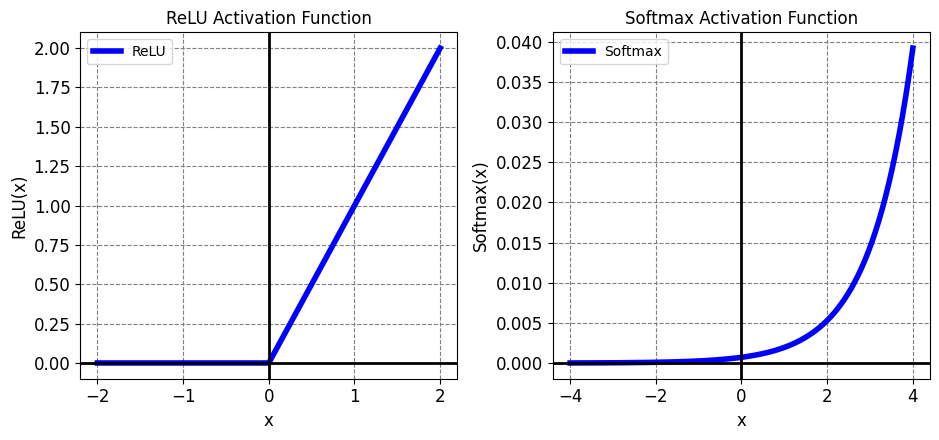

In [6]:
x = tf.linspace(-2, 2, 201)
x = tf.cast(x, tf.float32)

# Create the subplots for ReLU and Softmax
fig, axs = plt.subplots(1, 2, figsize=(9.5, 4.5))

# Plot ReLU
axs[0].plot(x, tf.nn.relu(x), label='ReLU', color='blue', linewidth=4)
axs[0].axhline(0, color='black', linewidth=2, linestyle='-')
axs[0].axvline(0, color='black', linewidth=2, linestyle='-')
axs[0].set(xlabel= 'x', ylabel='ReLU(x)', title='ReLU Activation Function')
axs[0].legend()
axs[0].grid(True)

x = tf.linspace(-4, 4, 201)
x = tf.cast(x, tf.float32)

# Plot Softmax
axs[1].plot(x, tf.nn.softmax(x, axis=0), label='Softmax', color='blue', linewidth=4)
axs[1].axhline(0, color='black', linewidth=2, linestyle='-')
axs[1].axvline(0, color='black', linewidth=2, linestyle='-')
axs[1].set(xlabel= 'x', ylabel= 'Softmax(x)', title='Softmax Activation Function')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()

### The Dense Layer

Let's craft a class to represent the dense layer within our neural network. In a multi-layer perceptron (MLP), the outputs of one layer are fully connected to the inputs of the next layer. In a dense layer, the input dimension can be inferred from the output dimension of the preceding layer. As a result, there's no need to explicitly provide input dimensions during initialization {cite:p}`TensorFlowDocumentation`.

For stable training dynamics, the proper initialization of weights is crucial. One widely employed technique is the Xavier initialization scheme. It entails sampling each element of the weight matrix from a uniform distribution {cite:p}`TensorFlowDocumentation`:

\begin{equation}
W_{ij} \sim \text{Uniform}\left(-\frac{\sqrt{6}}{\sqrt{n + m}}, \frac{\sqrt{6}}{\sqrt{n + m}}\right)
\end{equation}

In this equation, $n$ denotes the number of input neurons, while $m$ signifies the number of output neurons. To ensure a balanced starting point for activations, the bias vector can be initialized to zeros. By encapsulating these principles within the dense layer class, we lay a robust foundation for the construction of our neural network architecture.

In [7]:
def xavier_init(shape):
    """
    Xavier weight initialization for a weight matrix.

    Args:
    shape (tuple): Shape of the weight matrix (input_dim, output_dim).

    Returns:
    tf.Tensor: Initialized weight matrix using Xavier initialization.
    """
    in_dim, out_dim = shape

    # Compute the Xavier initialization bounds
    xavier_lim = tf.sqrt(6.) / tf.sqrt(tf.cast(in_dim + out_dim, tf.float32))

    # Generate weight values using uniform distribution within the bounds
    weight_vals = tf.random.uniform(shape=(in_dim, out_dim),
                                    minval=-xavier_lim, maxval=xavier_lim, seed=22)

    return weight_vals


The provided code defines a function named `xavier_init` that facilitates the Xavier weight initialization technique. This technique aims to provide appropriate initial values for the weights of a neural network layer, contributing to stable and effective training. Here's a breakdown of the code and its purpose:

- `def xavier_init(shape):`:
  - This line begins the definition of the function `xavier_init`, which takes a single argument named `shape`. The `shape` argument is expected to be a tuple indicating the shape of the weight matrix to be initialized. The shape should include the dimensions of the input and output of the layer (input_dim, output_dim).

- `"""Xavier weight initialization for a weight matrix."""`:
  - This docstring provides a brief explanation of the function's purpose. It serves as documentation to help users understand what the function does and how to use it.

- `in_dim, out_dim = shape`:
  - Here, the tuple `shape` is unpacked into `in_dim` and `out_dim`, representing the number of input and output neurons of the layer, respectively.

- `xavier_lim = tf.sqrt(6.) / tf.sqrt(tf.cast(in_dim + out_dim, tf.float32))`:
  - This line calculates the Xavier initialization bounds for the weight values. It uses the formula: Xavier bounds = sqrt(6) / sqrt(input_dim + output_dim). This is a critical step in ensuring that the initial weight values are within appropriate ranges for effective training.

- `weight_vals = tf.random.uniform(shape=(in_dim, out_dim), minval=-xavier_lim, maxval=xavier_lim, seed=22)`:
  - This line generates random weight values using a uniform distribution. The shape of the weight matrix is specified as `(in_dim, out_dim)`, and the values are drawn from the interval `[-xavier_lim, xavier_lim]`. The `seed` parameter ensures reproducibility.

- `return weight_vals`:
  - The function returns the initialized weight matrix, which is a tensor containing the generated weight values.

The Xavier initialization method can alternatively be implemented using `tf.keras.initializers.GlorotUniform`. This initializer encapsulates the logic of Xavier initialization, making it even more convenient to apply across different layers of a neural network {cite:p}`TensorFlowDocumentation`.

In [8]:
class DenseLayer(tf.Module):
    def __init__(self, out_dim, weight_init=xavier_init, activation=tf.identity):
        """
        Initialize the DenseLayer.

        Args:
        out_dim (int): Number of output neurons.
        weight_init (callable): Weight initialization function (default: Xavier initialization).
        activation (callable): Activation function (default: identity).
        """
        # Initialize the output dimensions, weight initializer, and activation function
        self.out_dim = out_dim
        self.weight_init = weight_init
        self.activation = activation
        self.built = False

    def __call__(self, x):
        """
        Execute a forward pass through the DenseLayer.

        Args:
        x (tf.Tensor): Input tensor.

        Returns:
        tf.Tensor: Output tensor after applying activation.
        """
        if not self.built:
            # Infer input dimension and initialize weights and biases on the first call
            self.in_dim = x.shape[1]
            self.w = tf.Variable(self.weight_init(shape=(self.in_dim, self.out_dim)))
            self.b = tf.Variable(tf.zeros(shape=(self.out_dim,)))
            self.built = True

        # Compute the forward pass
        z = tf.add(tf.matmul(x, self.w), self.b)
        return self.activation(z)

This code snippet defines a `DenseLayer` class, representing a dense layer within a neural network. Let's break down its structure and functionality:

- `class DenseLayer(tf.Module):`:
  - This line starts the definition of the `DenseLayer` class, which is derived from `tf.Module`. This inheritance provides certain capabilities and functionalities from TensorFlow.

- `def __init__(self, out_dim, weight_init=xavier_init, activation=tf.identity):`:
  - This is the class's constructor method (`__init__`). It initializes a `DenseLayer` instance with parameters:
    - `out_dim`: The number of output neurons for this layer.
    - `weight_init`: A callable representing the weight initialization function. It defaults to `xavier_init`, which was defined earlier.
    - `activation`: A callable representing the activation function. It defaults to `tf.identity`, which is a linear activation.

- `self.out_dim = out_dim`, `self.weight_init = weight_init`, `self.activation = activation`:
  - These lines initialize instance variables to store the output dimension, weight initialization function, and activation function.

- `self.built = False`:
  - This initializes an instance variable, `built`, to `False`. It will be used to track whether the layer's weights and biases have been initialized.

- `def __call__(self, x):`:
  - This method allows the instance to be called as a function. It defines how the layer processes input `x`.

- `if not self.built:`:
  - This condition checks if the layer's weights and biases have already been initialized.

- `self.in_dim = x.shape[1]`, `self.w = tf.Variable(self.weight_init(shape=(self.in_dim, self.out_dim)))`, `self.b = tf.Variable(tf.zeros(shape=(self.out_dim,)))`, `self.built = True`:
  - Within the above condition, these lines infer the input dimension from the shape of `x`, initialize the weight matrix `w` using the specified weight initialization function, initialize the bias vector `b` with zeros, and mark the layer as built.

- `z = tf.add(tf.matmul(x, self.w), self.b)`:
  - This computes the linear combination of the input `x` with the weights and biases.

- `return self.activation(z)`:
  - The activation function is applied to the linear combination, producing the final output of the layer.

Next, build a class for the MLP model that executes layers sequentially.
Remember that the model variables are only available after the first sequence of dense layer calls due to dimension inference.

In [9]:
class MLP(tf.Module):
    def __init__(self, layers):
        """
        Initialize the Multi-Layer Perceptron (MLP).

        Args:
        layers (list): List of layers to be used in the MLP.
        """
        self.layers = layers

    @tf.function
    def __call__(self, x, preds=False):
        """
        Execute the forward pass through the MLP.

        Args:
        x (tf.Tensor): Input tensor.
        preds (bool): If True, return model predictions.

        Returns:
        tf.Tensor: Output tensor after passing through all layers.
        """
        # Execute the model's layers sequentially
        for layer in self.layers:
            x = layer(x)

        # If preds is True, return model predictions
        if preds:
            return x

        return x

This code snippet defines a `MLP` (Multi-Layer Perceptron) class that represents a neural network architecture. Let's break down its structure and functionality:

- `class MLP(tf.Module):`:
  - This line initiates the definition of the `MLP` class, inheriting from `tf.Module`.

- `def __init__(self, layers):`:
  - This is the class's constructor method (`__init__`). It initializes an instance of the `MLP` class with a parameter:
    - `layers`: A list containing the layers that compose the neural network architecture.

- `self.layers = layers`:
  - This line initializes an instance variable, `layers`, to store the provided list of layers.

- `@tf.function`:
  - This decorator optimizes the performance of the function it decorates by compiling it as a TensorFlow graph for execution speedup.

- `def __call__(self, x, preds=False):`:
  - This method allows an instance of the `MLP` class to be called as a function. It defines how the input tensor `x` is processed through the neural network.

- `for layer in self.layers:`:
  - This loop iterates over each layer in the list of layers.

- `x = layer(x)`:
  - Inside the loop, this line applies the current layer's computation to the input tensor `x`. The updated `x` becomes the output of this layer, which is then used as input for the next layer.

- `if preds:`:
  - This condition checks whether the `preds` argument is `True`.

- `return x`:
  - If `preds` is `True`, the method returns the final output tensor, which represents the model's predictions.

- `return x`:
  - If `preds` is `False` (or not provided), the method returns the final output tensor after passing through all the layers.

Overall, this `MLP` class encapsulates the structure of a neural network composed of multiple layers. The class's `__call__` method performs the forward pass through the network by sequentially applying the layers' computations to the input tensor. The use of `@tf.function` helps optimize the execution speed of the forward pass. The class provides the flexibility to obtain the final predictions if desired, making it a convenient tool for creating and using neural network architectures.

Initialize an MLP model with the specified architecture:

- Forward Pass: Dense(784 x 700) x Dense(700 x 500) x Dense(500 x 10)

In this architecture, each layer uses a ReLU activation function except for the final layer, which is linear. The softmax activation function is not applied within the MLP; it's computed separately in the loss and prediction functions {cite:p}`TensorFlowDocumentation`.

In [10]:
# Define the sizes of hidden layers and output
hidden_layer_1_size = 700
hidden_layer_2_size = 500
output_size = 10

# Initialize the MLP model
mlp_model = MLP([
    DenseLayer(out_dim=hidden_layer_1_size, activation=tf.nn.relu),
    DenseLayer(out_dim=hidden_layer_2_size, activation=tf.nn.relu),
    DenseLayer(out_dim=output_size)])

### Define the loss function

For multiclass classification tasks, the cross-entropy loss function is a suitable choice. It quantifies the negative log-likelihood of the data based on the model's predicted probabilities. Higher probabilities assigned to the true class result in lower loss values. The mathematical formula for the cross-entropy loss is as follows {cite:p}`TensorFlowDocumentation`:

\begin{equation}
L = -\frac{1}{n}\sum_{i=1}^{n}\sum_{j=1}^{m} y_{j}^{[i]} \cdot \log(\hat{y_{j}}^{[i]})
\end{equation}

Where:
* $\hat{y}$ is a matrix of predicted class distributions of shape $(n \times m)$.
* $y$ is a one-hot encoded matrix of true classes of shape $(n \times m)$.

The `tf.nn.sparse_softmax_cross_entropy_with_logits` function can efficiently compute the cross-entropy loss. Importantly, this function doesn't require the last layer of the model to use the softmax activation. Additionally, it accommodates non-one-hot-encoded class labels.

This loss function is crucial for guiding the model's learning process towards improved classification accuracy.

In [11]:
def cross_entropy_loss(y_pred, y):
    """
    Compute the cross-entropy loss.

    Args:
    y_pred (tf.Tensor): Predicted class distributions.
    y (tf.Tensor): True class labels.

    Returns:
    tf.Tensor: Mean cross-entropy loss.
    """
    # Compute cross entropy loss with a sparse operation
    sparse_ce = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=y_pred)

    # Calculate the mean of the cross-entropy loss
    mean_ce = tf.reduce_mean(sparse_ce)
    return mean_ce

Create a fundamental accuracy function that assesses the ratio of accurately classified instances during training. To transform softmax outputs into class predictions, determine the index associated with the highest class probability. This can be achieved using the `tf.argmax` function.

In [12]:
def accuracy(y_pred, y):
    """
    Calculate the accuracy of predictions.

    Args:
    y_pred (tf.Tensor): Predicted class distributions.
    y (tf.Tensor): True class labels.

    Returns:
    tf.Tensor: Accuracy of predictions.
    """
    # Extract class predictions using softmax outputs
    class_preds = tf.argmax(tf.nn.softmax(y_pred), axis=1)

    # Compare class predictions with true class labels and calculate accuracy
    is_equal = tf.equal(y, class_preds)
    accuracy = tf.reduce_mean(tf.cast(is_equal, tf.float32))
    return accuracy

### Train the Model

Utilizing an optimizer can lead to considerably faster convergence compared to standard gradient descent. Below, the Adam optimizer is implemented for training the model. To delve deeper into the world of designing custom optimizers with TensorFlow Core, explore the [Optimizers](https://www.tensorflow.org/guide/core/optimizers_core) guide {cite:p}`TensorFlowDocumentation`.

In [13]:
class Adam:
    def __init__(self, learning_rate=1e-3, beta_1=0.9, beta_2=0.999, epsilon=1e-7):
        """
        Initialize the Adam optimizer.

        Args:
        learning_rate (float): Learning rate (default: 1e-3).
        beta_1 (float): Exponential decay rate for the first moment estimates (default: 0.9).
        beta_2 (float): Exponential decay rate for the second moment estimates (default: 0.999).
        epsilon (float): Small constant to prevent division by zero (default: 1e-7).
        """
        # Initialize optimizer parameters and variable slots
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.t = 1.
        self.v_dvar, self.s_dvar = [], []
        self.built = False

    def apply_gradients(self, grads, vars):
        """
        Apply gradients to update model variables.

        Args:
        grads (list): List of gradients corresponding to model variables.
        vars (list): List of model variables.

        Returns:
        None
        """
        # Initialize variables on the first call
        if not self.built:
            for var in vars:
                v = tf.Variable(tf.zeros(shape=var.shape))
                s = tf.Variable(tf.zeros(shape=var.shape))
                self.v_dvar.append(v)
                self.s_dvar.append(s)
            self.built = True

        # Update model variables given gradients
        for i, (d_var, var) in enumerate(zip(grads, vars)):
            self.v_dvar[i].assign(self.beta_1 * self.v_dvar[i] + (1 - self.beta_1) * d_var)
            self.s_dvar[i].assign(self.beta_2 * self.s_dvar[i] + (1 - self.beta_2) * tf.square(d_var))
            v_dvar_bias_corrected = self.v_dvar[i] / (1 - (self.beta_1 ** self.t))
            s_dvar_bias_corrected = self.s_dvar[i] / (1 - (self.beta_2 ** self.t))
            var.assign_sub(self.learning_rate * (v_dvar_bias_corrected / (tf.sqrt(s_dvar_bias_corrected) + self.epsilon)))

        self.t += 1.

The provided code defines a custom implementation of the Adam optimizer. Below is an explanation of each key component:

1. **Initialization (`__init__` method):**
   - The `Adam` class is initialized with several hyperparameters: `learning_rate`, `beta_1`, `beta_2`, and `epsilon`. These hyperparameters control the optimization process.
   - `learning_rate`: The step size used for updating the model parameters.
   - `beta_1` and `beta_2`: Exponential decay rates for the first and second moment estimates of the gradients.
   - `epsilon`: A small constant added to prevent division by zero.
   - `t`, `v_dvar`, and `s_dvar` are used to keep track of the current iteration, first moment estimates, and second moment estimates respectively.
   - The `built` flag is used to indicate whether the optimizer's variables have been initialized.

2. **Gradient Application (`apply_gradients` method):**
   - This method is responsible for applying gradients to update the model variables.
   - It initializes the optimizer's variables on the first call, creating slots for first and second moment estimates for each model variable.
   - For each variable, the method updates the first moment estimate (`v_dvar`) and second moment estimate (`s_dvar`) based on the gradients (`grads`) using the Adam update rules.
   - The `t` counter is used for bias correction to adjust the estimates when they are first initialized.
   - Finally, the model variables are updated using the computed update step.

Overall, the `Adam` class encapsulates the Adam optimization algorithm. It initializes necessary variables, applies the optimization updates to model parameters, and includes bias correction mechanisms. It's a crucial component for training neural networks efficiently.

Now, create a customized training loop that employs mini-batch gradient descent to update the parameters of the MLP. Utilizing mini-batches for training offers advantages in terms of memory efficiency and quicker convergence.

In [14]:
def train_step(x_batch, y_batch, loss, acc, model, optimizer):
    """
    Perform a training step using mini-batch gradient descent.

    Args:
    x_batch (tf.Tensor): Batch of input data.
    y_batch (tf.Tensor): Batch of true labels.
    loss (callable): Loss function.
    acc (callable): Accuracy function.
    model (tf.Module): Model to be trained.
    optimizer (Adam): Custom Adam optimizer.

    Returns:
    tf.Tensor: Batch loss.
    tf.Tensor: Batch accuracy.
    """
    # Update the model state given a batch of data
    with tf.GradientTape() as tape:
        y_pred = model(x_batch)
        batch_loss = loss(y_pred, y_batch)
    batch_acc = acc(y_pred, y_batch)
    grads = tape.gradient(batch_loss, model.variables)
    optimizer.apply_gradients(grads, model.variables)
    return batch_loss, batch_acc

def val_step(x_batch, y_batch, loss, acc, model):
    """
    Evaluate the model on validation data using mini-batches.

    Args:
    x_batch (tf.Tensor): Batch of validation input data.
    y_batch (tf.Tensor): Batch of true labels for validation.
    loss (callable): Loss function.
    acc (callable): Accuracy function.
    model (tf.Module): Model to be evaluated.

    Returns:
    tf.Tensor: Batch loss.
    tf.Tensor: Batch accuracy.
    """
    # Evaluate the model on a given batch of validation data
    y_pred = model(x_batch)
    batch_loss = loss(y_pred, y_batch)
    batch_acc = acc(y_pred, y_batch)
    return batch_loss, batch_acc

The provided code defines two functions: `train_step` and `val_step`, which are crucial components of a custom training loop. Here's an explanation of each function:

1. **`train_step` Function:**
   - This function performs a single training step using mini-batch gradient descent.
   - **Arguments:**
     - `x_batch`: A batch of input data.
     - `y_batch`: A batch of true labels.
     - `loss`: A callable loss function.
     - `acc`: A callable accuracy function.
     - `model`: The model to be trained (an instance of `tf.Module`).
     - `optimizer`: The custom Adam optimizer (an instance of the `Adam` class).
   - The function starts by creating a gradient tape to record operations during the forward pass.
   - It calculates model predictions `y_pred` on the current batch using the provided `model`.
   - Computes the batch loss using the provided loss function `loss`.
   - Calculates the batch accuracy using the provided accuracy function `acc`.
   - Computes the gradients of the `batch_loss` with respect to the model's variables using the gradient tape.
   - Updates the model's variables by applying the computed gradients using the `optimizer`.
   - The function returns both the `batch_loss` and `batch_acc`.

2. **`val_step` Function:**
   - This function evaluates the model's performance on a validation batch using mini-batches.
   - **Arguments:**
     - `x_batch`: A batch of validation input data.
     - `y_batch`: A batch of true labels for validation.
     - `loss`: A callable loss function.
     - `acc`: A callable accuracy function.
     - `model`: The model to be evaluated (an instance of `tf.Module`).
   - The function calculates model predictions `y_pred` on the validation batch using the provided `model`.
   - Computes the batch loss and batch accuracy using the provided loss and accuracy functions, respectively.
   - The function returns both the `batch_loss` and `batch_acc`.

These functions are crucial for implementing the training and validation loops of a neural network. They encapsulate the logic for calculating losses, accuracies, gradients, and applying updates, making the custom training loop more organized and efficient.

In [15]:
def print_bold(txt, color_code=35):
    """
    Display text in bold with optional color.

    Args:
        - txt (str): The text to be displayed.
        - color_code (int): ANSI color code for the text (default is 35 for purple).
    """
    print(f"\033[1;{color_code}m{txt}\033[0m")

def train_model(mlp, train_data, val_data, loss, acc, optimizer, epochs):
    """
    Train a given MLP model using mini-batch gradient descent.

    Args:
    mlp (MLP): Multi-Layer Perceptron model.
    train_data (tf.data.Dataset): Training data.
    val_data (tf.data.Dataset): Validation data.
    loss (callable): Loss function.
    acc (callable): Accuracy function.
    optimizer (Adam): Custom Adam optimizer.
    epochs (int): Number of training epochs.

    Returns:
    list: List of training losses.
    list: List of training accuracies.
    list: List of validation losses.
    list: List of validation accuracies.
    """
    # Initialize data structures to track performance
    train_losses, train_accs = [], []
    val_losses, val_accs = [], []

    # Begin training loop
    for epoch in range(epochs):
        batch_losses_train, batch_accs_train = [], []
        batch_losses_val, batch_accs_val = [], []

        # Iterate over the training data
        for x_batch, y_batch in train_data:
            # Perform a training step and update the model
            batch_loss, batch_acc = train_step(x_batch, y_batch, loss, acc, mlp, optimizer)
            batch_losses_train.append(batch_loss)
            batch_accs_train.append(batch_acc)

        # Iterate over the validation data
        for x_batch, y_batch in val_data:
            batch_loss, batch_acc = val_step(x_batch, y_batch, loss, acc, mlp)
            batch_losses_val.append(batch_loss)
            batch_accs_val.append(batch_acc)

        # Calculate epoch-level performance metrics
        train_loss = tf.reduce_mean(batch_losses_train)
        train_acc = tf.reduce_mean(batch_accs_train)
        val_loss = tf.reduce_mean(batch_losses_val)
        val_acc = tf.reduce_mean(batch_accs_val)

        # Append performance metrics to lists
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        val_losses.append(val_loss)
        val_accs.append(val_acc)

        # Print epoch-level performance
        print_bold(f"Epoch: {epoch}")
        print(f"\tTraining loss: {train_loss:.3f}, Training accuracy: {train_acc:.3f}")
        print(f"\tValidation loss: {val_loss:.3f}, Validation accuracy: {val_acc:.3f}")

    return train_losses, train_accs, val_losses, val_accs

Train the MLP model for 10 epochs using a batch size of 128. If available, hardware accelerators such as GPUs or TPUs can significantly expedite the training process.

In [16]:
# Train the MLP model
# Pass the MLP model, training data, validation data, loss function, accuracy function, optimizer, and number of epochs
train_losses, train_accs, val_losses, val_accs = train_model(
    mlp_model,             # The MLP model to be trained
    train_data,            # Training data
    val_data,              # Validation data
    loss=cross_entropy_loss,  # Loss function (cross-entropy)
    acc=accuracy,          # Accuracy function
    optimizer=Adam(),      # Custom Adam optimizer
    epochs=10              # Number of training epochs
)

Epoch: 0
	Training loss: 0.222, Training accuracy: 0.934
	Validation loss: 0.121, Validation accuracy: 0.963
Epoch: 1
	Training loss: 0.079, Training accuracy: 0.975
	Validation loss: 0.099, Validation accuracy: 0.971
Epoch: 2
	Training loss: 0.047, Training accuracy: 0.986
	Validation loss: 0.088, Validation accuracy: 0.976
Epoch: 3
	Training loss: 0.034, Training accuracy: 0.989
	Validation loss: 0.095, Validation accuracy: 0.975
Epoch: 4
	Training loss: 0.026, Training accuracy: 0.992
	Validation loss: 0.110, Validation accuracy: 0.971
Epoch: 5
	Training loss: 0.023, Training accuracy: 0.992
	Validation loss: 0.103, Validation accuracy: 0.976
Epoch: 6
	Training loss: 0.018, Training accuracy: 0.994
	Validation loss: 0.096, Validation accuracy: 0.979
Epoch: 7
	Training loss: 0.017, Training accuracy: 0.994
	Validation loss: 0.110, Validation accuracy: 0.977
Epoch: 8
	Training loss: 0.017, Training accuracy: 0.994
	Validation loss: 0.117, Validation accuracy: 0.976
Epoch: 9
	Training 

### Performance Evaluation

Begin by creating a plotting function that visualizes the loss and accuracy of the model throughout the training process.

In [19]:
def plot_metrics(train_metric, val_metric, metric_type, ax):
    """
    Visualize training and validation metrics over epochs using the provided axes.

    Args:
    train_metric (list): List of training metrics (e.g., loss, accuracy) for each epoch.
    val_metric (list): List of validation metrics for each epoch.
    metric_type (str): Type of metric being visualized (e.g., "Loss", "Accuracy").
    ax (matplotlib.axes._subplots.AxesSubplot): Axes to use for plotting.

    Returns:
    None
    """
    # Plot training and validation metrics over epochs with distinctive colors and markers
    ax.plot(range(len(train_metric)), train_metric, label=f"Training {metric_type}", color="dodgerblue", linewidth=2, marker="o", markersize=6)
    ax.plot(range(len(val_metric)), val_metric, label=f"Validation {metric_type}", color="tomato", linewidth=2, marker="s", markersize=6)

    # Add labels and legend with larger fonts
    ax.set_xlabel("Epochs", fontsize=12)
    ax.set_ylabel(metric_type, fontsize=12)
    ax.legend(fontsize=12)

    # Set the title with an even larger font and a bold style
    ax.set_title(f"{metric_type} vs Training epochs", fontsize=18, fontweight="bold")

    # Add a grid with a lighter color for better readability
    ax.grid(True, alpha=0.3)

    # Customize ticks and labels with a consistent style
    ax.tick_params(axis="both", which="major", labelsize=12)

    # Get the figure instance from the provided axes
    fig = ax.figure

    # Add a background color to the plot
    fig.patch.set_facecolor("whitesmoke")


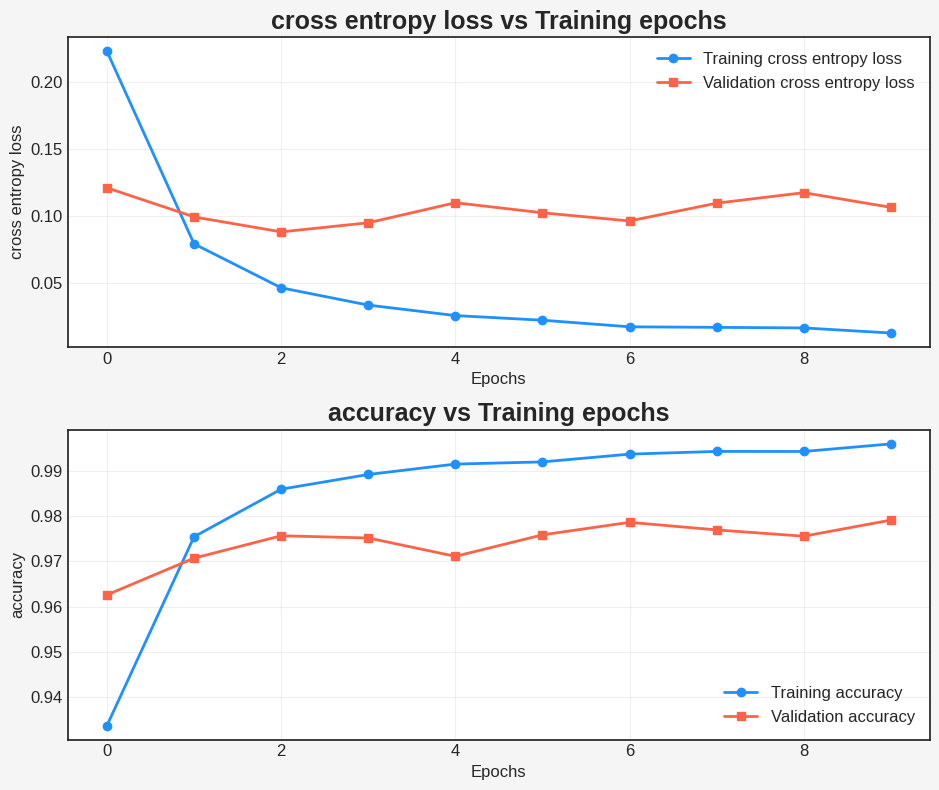

In [20]:
plt.style.use("seaborn-v0_8-white")
fig, ax = plt.subplots(2, 1, figsize=(9.5, 8))

plot_metrics(train_losses, val_losses, "cross entropy loss", ax = ax[0])
plot_metrics(train_accs, val_accs, "accuracy", ax = ax[1])

plt.tight_layout()

## Creating a Versatile Prediction Module: Data Preprocessing, Probability Prediction, and Class Prediction

Designing a module that accepts raw data and carries out the subsequent tasks {cite:p}`TensorFlowDocumentation`:
- Preprocessing of data
- Predicting probabilities
- Predicting classes

In [21]:
class ExportModule(tf.Module):
    def __init__(self, model, preprocess, class_pred):
        """
        Initialize the ExportModule.

        Args:
        model (tf.Module): The trained model for prediction.
        preprocess (callable): Preprocessing function for raw data.
        class_pred (callable): Function for generating class predictions.
        """
        self.model = model
        self.preprocess = preprocess
        self.class_pred = class_pred

    @tf.function(input_signature=[tf.TensorSpec(shape=[None, None, None, None], dtype=tf.uint8)])
    def __call__(self, x):
        """
        Perform prediction using the ExportModule.

        Args:
        x (tf.Tensor): Raw input data.

        Returns:
        tf.Tensor: Predicted class labels.
        """
        x = self.preprocess(x)
        y = self.model(x)
        y = self.class_pred(y)
        return y

def preprocess_test(x):
    """
    Preprocess raw input data.

    Args:
    x (tf.Tensor): Raw input data.

    Returns:
    tf.Tensor: Preprocessed data.
    """
    # Reshape and normalize the data
    x = tf.reshape(x, shape=[-1, 784])
    x = x/255
    return x

def class_pred_test(y):
    """
    Generate class predictions from model's output.

    Args:
    y (tf.Tensor): Model's output.

    Returns:
    tf.Tensor: Predicted class labels.
    """
    return tf.argmax(tf.nn.softmax(y), axis=1)

# Create an instance of ExportModule for prediction
mlp_model_export = ExportModule(model=mlp_model,
                                preprocess=preprocess_test,
                                class_pred=class_pred_test)

In this code, the `ExportModule` class is defined, which takes a trained model, preprocessing function, and class prediction function as inputs. The `__call__` method of `ExportModule` preprocesses the input data, gets predictions from the model, and generates class predictions. The `preprocess_test` function reshapes and normalizes raw input data, while the `class_pred_test` function generates class predictions from the model's output. Finally, an instance of `ExportModule` called `mlp_model_export` is created for prediction.

In [22]:
def accuracy_score(y_pred, y):
    """
    Calculate accuracy score between predicted and true labels.

    Args:
    y_pred (tf.Tensor): Predicted class labels.
    y (tf.Tensor): True class labels.

    Returns:
    tf.Tensor: Accuracy score.
    """
    # Compare predicted and true labels element-wise
    is_equal = tf.equal(y_pred, y)

    # Calculate mean accuracy
    return tf.reduce_mean(tf.cast(is_equal, tf.float32))

# Load the test data and true labels
x_test, y_test = tfds.load("mnist", split=['test'], batch_size=-1, as_supervised=True)[0]

# Perform predictions using the ExportModule
test_classes = mlp_model_export(x_test)

# Calculate test accuracy
test_acc = accuracy_score(test_classes, y_test)

# Print the test accuracy
print(f"Test Accuracy: {test_acc:.3f}")


Test Accuracy: 0.979


In this code, the `accuracy_score` function calculates the accuracy between predicted and true class labels. The `x_test` and `y_test` data are loaded from the MNIST dataset using TensorFlow Datasets (`tfds`). Predictions are performed using the `mlp_model_export` instance of the `ExportModule`, and then the accuracy is calculated using the `accuracy_score` function. Finally, the test accuracy is printed.

In [23]:
def accuracy_score(y_pred, y):
  # Generic accuracy function
  is_equal = tf.equal(y_pred, y)
  return tf.reduce_mean(tf.cast(is_equal, tf.float32))

x_test, y_test = tfds.load("mnist", split=['test'], batch_size=-1, as_supervised=True)[0]
test_classes = mlp_model_export(x_test)
test_acc = accuracy_score(test_classes, y_test)
print(f"Test Accuracy: {test_acc:.3f}")

Test Accuracy: 0.979


The model exhibits exceptional performance in classifying handwritten digits within both the training dataset and unseen data. To ensure its robustness, let's delve into the model's class-wise accuracy, scrutinizing its proficiency in correctly identifying each individual digit. This granular analysis will provide us with insights into its overall reliability and effectiveness across all classes.

In [24]:
import pandas as pd

print("Accuracy breakdown by digit:")
print("---------------------------")

# Initialize a dictionary to store accuracy for each label
label_accs = {}

# Iterate through each digit label
for label in range(10):
    # Create a boolean mask for the current digit
    label_ind = (y_test == label)

    # Extract predictions for the specific true label
    pred_label = test_classes[label_ind]
    true_labels = y_test[label_ind]

    # Compute class-wise accuracy for the current digit
    label_acc = accuracy_score(pred_label, true_labels).numpy()

    # Store the accuracy in the dictionary with the digit label as the key
    label_accs[label] = label_acc

# Create a DataFrame to hold the accuracy breakdown
accuracy_df = pd.DataFrame(label_accs.items(), columns=['Digit', 'Accuracy'])

# Sort the DataFrame by accuracy in ascending order
accuracy_df = accuracy_df.sort_values(by='Accuracy')

# Print the accuracy breakdown using the DataFrame
display(accuracy_df.style.hide( axis = 0))


Accuracy breakdown by digit:
---------------------------


Digit,Accuracy
6,0.968685
9,0.972250
7,0.972763
5,0.974215
3,0.977228
4,0.978615
0,0.980612
8,0.981520
2,0.987403
1,0.992070


This code snippet calculates and displays the accuracy breakdown for each digit class. It iterates through each digit label, extracts the corresponding predictions and true labels, computes the accuracy for that digit, and stores it in the `label_accs` dictionary. Finally, it prints the accuracy breakdown for each digit in ascending order of accuracy.

The accuracy values represent the proportion of correctly classified instances for each digit class in the test dataset. Higher accuracy values indicate better performance in correctly predicting the corresponding digit class.

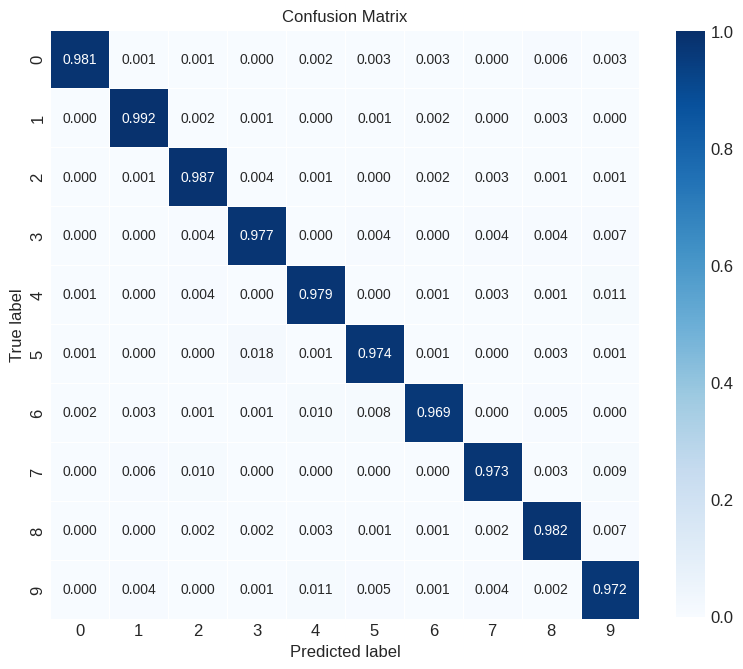

In [25]:
from sklearn import metrics
import seaborn as sns

def show_confusion_matrix(test_labels, test_classes):
    """
    Calculate and visualize the confusion matrix.

    Args:
    test_labels (tf.Tensor): True class labels.
    test_classes (tf.Tensor): Predicted class labels.

    Returns:
    None
    """
    # Calculate confusion matrix
    confusion = metrics.confusion_matrix(test_labels.numpy(), test_classes.numpy())

    # Normalize confusion matrix
    confusion_normalized = confusion / confusion.sum(axis=1, keepdims=True)

    # Define axis labels
    axis_labels = range(10)

    # Create a heatmap using seaborn
    fig, ax = plt.subplots(figsize=(9.5, 9.5))
    _ = sns.heatmap(
        confusion_normalized, xticklabels=axis_labels, yticklabels=axis_labels,
        cmap='Blues', annot=True, fmt='.3f', square=True, ax=ax,
        linewidths=0.4, vmin=0, vmax=1, cbar_kws={"shrink": 0.8})
    _ = ax.set(xlabel="Predicted label", ylabel="True label",
               title="Confusion Matrix")
    _ = ax.grid(False)


# Call the function to display the confusion matrix
show_confusion_matrix(y_test, test_classes)